In [1]:
import polars as pl
from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt
import numpy as np

### Skewed Normal
set a=0 for non-skewed normal distribution

<ipython-input-3-ace3e9a903f6>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


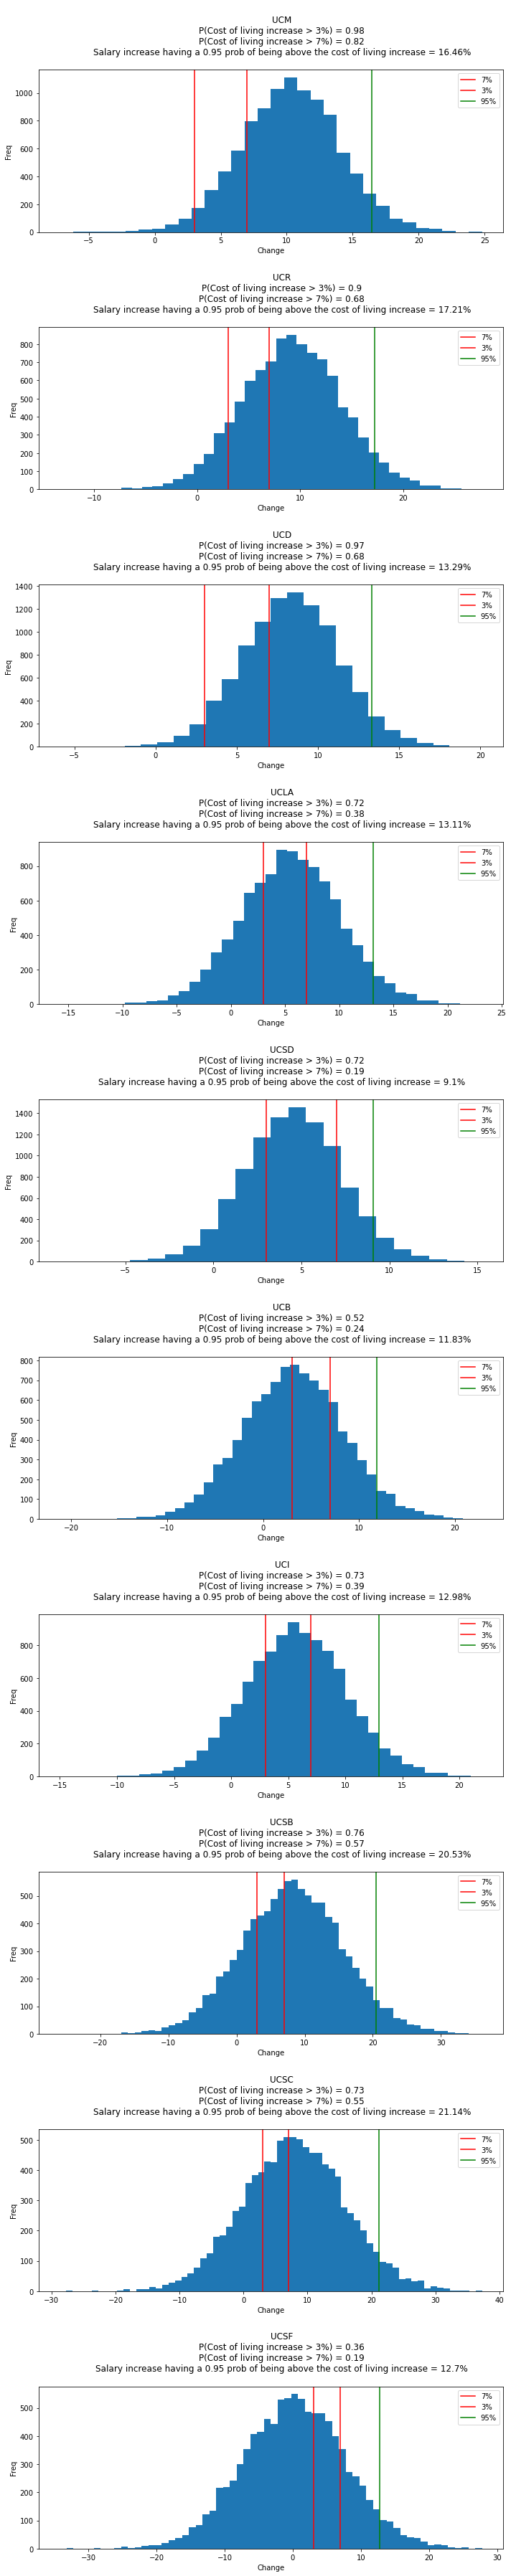

In [3]:
p = 0.95
n = len(df_avg_cost_change.columns)
fig, axs = plt.subplots(n, 1, tight_layout=True)
fig.set_size_inches(10, n*5)
axs = axs.flatten()

for i, col in enumerate(df_avg_cost_change.columns):

    a = 0
    loc = df_avg_cost_change[col][2]
    scale = df_avg_cost_change[col][3]

    sample = skewnorm.rvs(
        a=a,
        loc=loc, 
        scale=scale, 
        size=10_000, 
        random_state=42
    )

    ppf = np.round(skewnorm.ppf(p, a=a, loc=loc, scale=scale), 2)

    axs[i].hist(sample, bins=np.arange(min(sample)-1, max(sample)+1, 1))
    axs[i].axvline(x=7, color='r', label='7%')
    axs[i].axvline(x=3, color='r', label='3%')
    axs[i].axvline(x=ppf, color='g', label='95%')

    axs[i].set_xlabel('Change')
    axs[i].set_ylabel('Freq')
    axs[i].set_title(f'''
        {col}
        P(Cost of living increase > 3%) = {np.round(norm.sf(3, loc, scale), 2)}
        P(Cost of living increase > 7%) = {np.round(norm.sf(7, loc, scale), 2)}
        Salary increase having a {p} prob of being above the cost of living increase = {ppf}%
    ''')

    axs[i].legend()


fig.show()

In [38]:
rents = df_2bdr.select(pl.all().exclude('Year'))
# for i, col in enumerate(rents.columns):
#     print(rents[col])
rents

UCM,UCR,UCD,UCLA,UCSD,UCB,UCI,UCSB,UCSC,UCSF
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
839,1232,1342,1791,2460,2126,2037,1951,2439,3170
947,1289,1404,1956,2570,2239,2216,2324,2519,3339
1067,1390,1511,2058,2630,2383,2331,2374,3021,3553
1120,1509,1684,2044,2710,2274,2324,2516,3138,3198
1243,1751,1851,2222,2940,2405,2539,2667,3293,3188


In [40]:
for v in rents[len(rents[:,0])-1,:]:
    print(v[0])

1243
1751
1851
2222
2940
2405
2539
2667
3293
3188


In [67]:
import pandas as pd
rents = pd.read_csv('rentdata.csv').drop('Year', axis=1)
rent_cur = rents.iloc[-1:].values.tolist()[0]

In [68]:
rent_cur

[1243, 1751, 1851, 2222, 2940, 2405, 2539, 2667, 3293, 3188]

In [50]:
rents

,UCM,UCR,UCD,UCLA,UCSD,UCB,UCI,UCSB,UCSC,UCSF
0,839,1232,1342,1791,2460,2126,2037,1951,2439,3170
1,947,1289,1404,1956,2570,2239,2216,2324,2519,3339
2,1067,1390,1511,2058,2630,2383,2331,2374,3021,3553
3,1120,1509,1684,2044,2710,2274,2324,2516,3138,3198
4,1243,1751,1851,2222,2940,2405,2539,2667,3293,3188
